In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def operator(K, s, r, m, l):
    i_arr = np.linspace(1, l, l)
    sub_diag = (-r*i_arr[1:] + s**2 * (i_arr[1:])**2)/2
    diag_arr = -s**2 * (i_arr**2) - r
    sup_diag = (r*i_arr[:-1] + s**2 * (i_arr[:-1])**2)/2

    return np.diag(sub_diag, -1) + np.diag(diag_arr) + np.diag(sup_diag, 1)

def add_bc(t, K, T, r, l):
    return np.concatenate([np.array([(s**2 - r)/2 * K*np.exp(-r*(T-t))]),np.zeros(l-1)])

def payoff(x, K, put_or_call='call'):
    if put_or_call == 'call':
        return np.maximum(x - K, 0)
    elif put_or_call == 'put':
        return np.maximum(K - x, 0)

In [102]:
def finite_differences(K, s, r, T, m, l, alpha, beta, theta):
    delta = (beta - alpha)/(l+1)
    h = T/m
    
    x_grid = np.array([alpha + delta*i for i in range(1, l+1)])
    u  = [0]*(m+1)
    u[-1] = payoff(x_grid, K, 'put')   # terminal condition
    A = operator(K, s, r, m, l)

    for i in range(m - 1, -1, -1):
        u[i] = np.dot(np.linalg.inv(np.eye(l) - h*A),(u[i+1] + h*add_bc(i*h, K, T, r, l)))

    return x_grid, u[0]   # return the solution at t=0

In [103]:
K = 100
s = 0.2
r = 0.05
T = 1
m = 1000
l = 100
alpha = 0
beta = 2


sol = finite_differences(K, s, r, T, m, l, alpha, beta, 0)

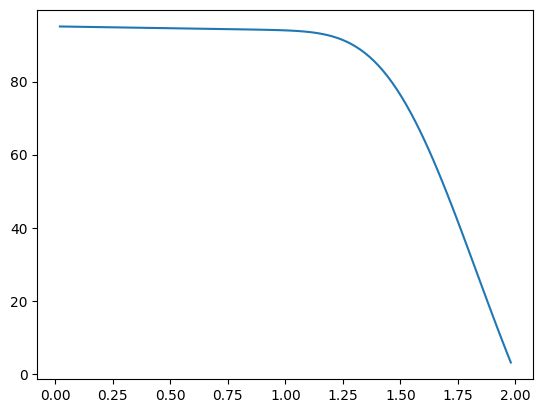

In [105]:
plt.plot(*sol)